# Load the required python packages and datasets

In [154]:
import sys
import os
#os.getcwd()
os.chdir('C:\\LUML\\Kaggle\\Rossmann')

In [155]:
os.getcwd()

'C:\\LUML\\Kaggle\\Rossmann'

In [156]:
os.listdir()

['.ipynb_checkpoints',
 'Rossmann Stores Forecasting.ipynb',
 'Rossmann.zip',
 'sample_submission.csv',
 'store.csv',
 'test.csv',
 'train.csv']

In [157]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series



In [158]:
#reading file from local disk.
#if data-set is huge, and dtype of columns isn't specified, python tries to figure out the data types of columns on its own.
#This can be processor-intensive task. Its for this reason low_memory parameter is specified here. It doesn't actually make the
#process less resource intensive but it suppresses the warning that appears when tried to run without it.

train = pd.read_csv("train.csv",sep=",",low_memory=False)
test = pd.read_csv("test.csv",sep=",",low_memory=False)
store = pd.read_csv("store.csv",sep=",",low_memory=False)

In [159]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# Basic Data Exploration

In [160]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [161]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [162]:
# Need to replace '0' with 0. it will reduce the categories to 4
train.groupby('StateHoliday').size()

StateHoliday
0    986159
a     20260
b      6690
c      4100
dtype: int64

In [163]:
#if (train.StateHoliday.isin(['a', 'b', 'c']) == False):
 #    train.StateHoliday == 0
   

In [164]:
#c = train['StateHoliday' == ]
#len(c)
#train.groupby('StateHoliday').size()

In [165]:
train.groupby('SchoolHoliday').size()

SchoolHoliday
0    835488
1    181721
dtype: int64

In [166]:
#0 sales 172871
#0 customers 172869
#train.groupby('Sales').size()
#train.groupby('Customers').size()

In [167]:
# there are two days where sales are 0 and there are only very few customers and the store is open
train[(train.Customers > 0) & (train.Sales == 0)]


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
478649,1100,2,2014-04-29,0,3,1,1,0,0
889932,948,4,2013-04-25,0,5,1,1,0,0


In [168]:
# there is no wrong data.. i mean with sales >0 with no customers
train[(train.Customers == 0) & (train.Sales > 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [169]:
train[(train.Open == 0) & (train.Sales > 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [170]:
#train[(train.StateHoliday == 'c') & (train.Sales > 0)]

In [171]:
#train[(train.SchoolHoliday == 1) & (train.Sales > 0)]

In [172]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [173]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [174]:
# Convert type of the Date column to datetime column and order the data by date column. 
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
train = train.sort_values(by = 'Date')
test = test.sort_values(by = 'Date')

In [175]:
train.head() #2013-01-01
train.tail() #2015-07-31 # train data we have is for 2 years 7 months -- need to check if there are any gaps in the data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
745,746,5,2015-07-31,9082,638,1,1,0,1
746,747,5,2015-07-31,10708,826,1,1,0,1
747,748,5,2015-07-31,7481,578,1,1,0,1
741,742,5,2015-07-31,10460,1016,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [176]:
test.head() #2015-08-01
test.tail() #2015-09-17 # test data has time period about 6 weeks

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
566,567,732,4,2015-09-17,1.0,1,0,0
565,566,731,4,2015-09-17,1.0,1,0,0
564,565,729,4,2015-09-17,1.0,1,0,0
562,563,727,4,2015-09-17,1.0,1,0,0
0,1,1,4,2015-09-17,1.0,1,0,0


In [177]:
#http://stackoverflow.com/questions/29530232/python-pandas-check-if-any-value-is-nan-in-dataframe
train.isnull().values.any()

False

In [178]:
test.isnull().values.any() #it means test has 11 rows with null values. Lets find out them
test.isnull().sum().sum()

11

In [179]:
#http://www.irfanelahi.com/how-to-missing-values-python-data-science/
#http://www.irfanelahi.com/data-science-document-classification-python/
from __future__ import print_function #my current version of python doesn't have the functionality that I intend to use in the
#following lines of codes so thus importing fresh and new print function from the future ;)
print (test.columns) 

#to calculate number of missing values in each column. True values are coerced as 1 and False as 0 and thus I used that
#fact in sum function to calculate how many missing values are there in each column:
for col_name in test.columns:
    print (col_name,end=": ")
    print (sum(test[col_name].isnull()))
 

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')
Id: 0
Store: 0
DayOfWeek: 0
Date: 0
Open: 11
Promo: 0
StateHoliday: 0
SchoolHoliday: 0


In [180]:
#missing values in Open column # Store 622
test[test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
10751,10752,622,6,2015-09-05,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0


In [181]:
#missing values can  be filled using fillna function as follows:
#It is better to assume the store is open. If it's closed then sales will be 0 and it won't count toward the score. 
# But if it's open and we predict 0 then we're in for some heavy penalty.
test['Open']=test['Open'].fillna(1) 
sum(test['Open'].isnull())

0

In [182]:
# Holiday Analysis
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# public holiday - 2%
train.groupby('StateHoliday').size().to_frame() / len(train)

,0
StateHoliday,
0,0.969475
a,0.019917
b,0.006577
c,0.004031


In [183]:
# Test has 0 rows for Easter holiday and christmas
# Even the % of public holiday is very less - 0.4%
test.groupby('StateHoliday').size().to_frame()  / len(test)

,0
StateHoliday,
0,0.995619
a,0.004381


In [184]:
train.groupby('SchoolHoliday').size().to_frame() / len(train)

,0
SchoolHoliday,
0,0.821353
1,0.178647


In [185]:
# In test, 44% of the period are school holidays. In train, 18% of the time only
test.groupby('SchoolHoliday').size().to_frame() / len(test)

,0
SchoolHoliday,
0,0.556513
1,0.443487


In [186]:
# Check to see if all the stores in test are in train and viceversa
#http://hamelg.blogspot.com/search?q=python+for+data+analysis
len(train['Store'].unique()) # there are 1115 stores in train data
len(test['Store'].unique()) # there are 856 stores in test data
# check with mentor on how to write query to find out test stores in train and viceversa

856

In [187]:
# % of open stores vs not open in train
train.groupby('Open').size().to_frame() / len(train)

,0
Open,
0,0.169893
1,0.830107


In [188]:
# % of open stores vs not open in test
test.groupby('Open').size().to_frame()  / len(test)

,0
Open,
0.0,0.145639
1.0,0.854361


In [189]:
# % of stores where promotion happened - train
train.groupby('Promo').size().to_frame()  / len(train)

,0
Promo,
0,0.618485
1,0.381515


In [190]:
# % of stores where promotion happened - test
test.groupby('Promo').size().to_frame()  / len(test)

,0
Promo,
0,0.604167
1,0.395833


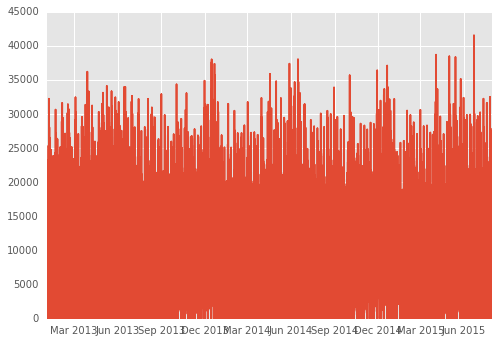

In [202]:
# import matplotlib.dates as mdates
import datetime as DT
#matplotlib.style.use('ggplot')
plt.figure()
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
plt.plot(train.Date, train.Sales)
plt.show()
#ts = pd.Series(train.Sales, index=pd.date_range(train.Date))


In [193]:
import seaborn as sns
sns.set_style('whitegrid')

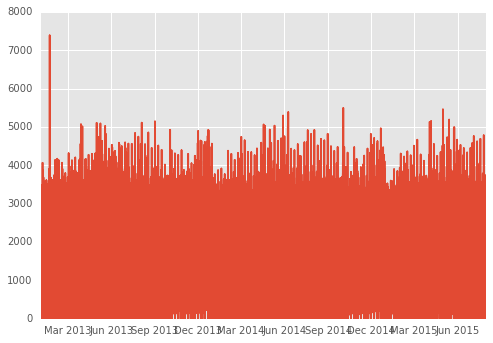

In [203]:
plt.figure()
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
plt.plot(train.Date, train.Customers)
plt.show()

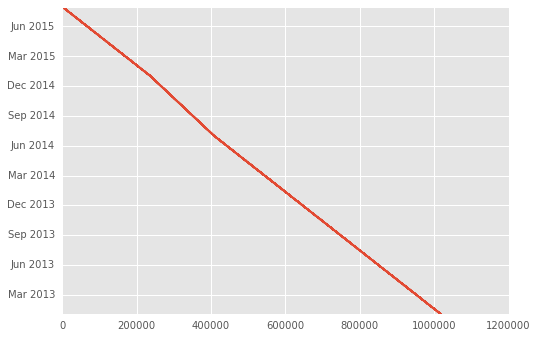

In [219]:
# check if there are any gaps in train time period
plt.plot(train.Date)
plt.show()

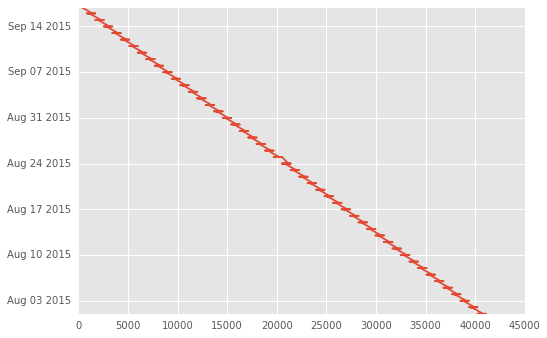

In [220]:
# check if there are any gaps in test period
plt.plot(test.Date)
plt.show()

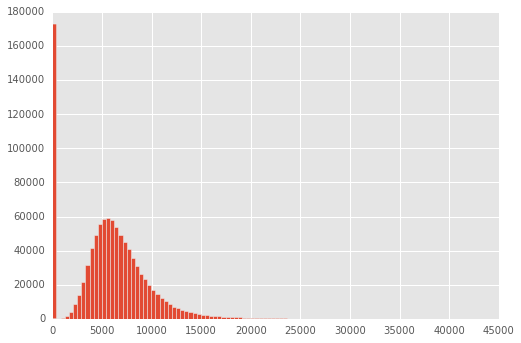

In [225]:
plt.hist(train.Sales, 100)#, bins=range(min(train.Sales), max(train.Sales) + 10, 10))
plt.show()

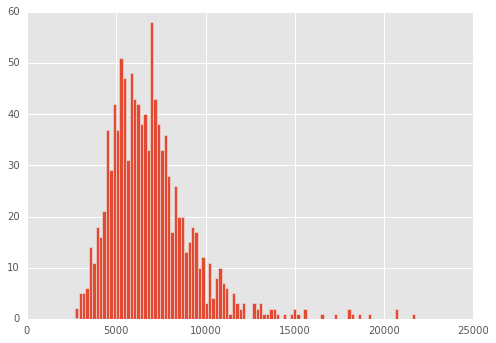

In [261]:
#mean sales per store when store is not closed
sales = train[train.Sales != 0]
meansales = sales[['Store','Sales']].groupby('Store').mean()
#meansales['Store'] = meansales.index
plt.hist(meansales.Sales, 100)
plt.show()

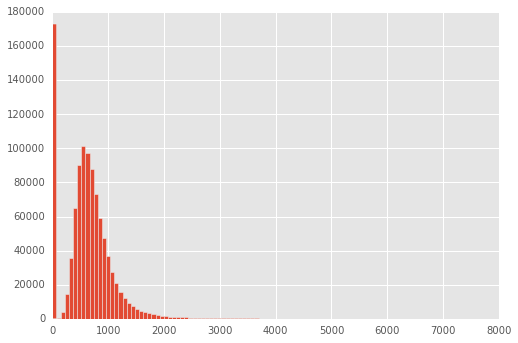

In [227]:
plt.hist(train.Customers, 100)#, bins=range(min(train.Sales), max(train.Sales) + 10, 10))
plt.show()

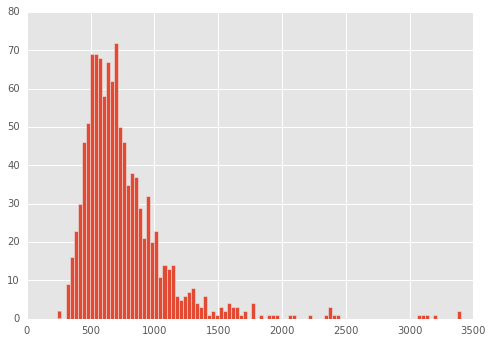

In [266]:
#avg customers per store when store is not closed
customers = train[train.Sales != 0]
avgcustomers = customers[['Store','Customers']].groupby('Store').mean()
#avgcustomers['Store'] = avgcustomers.index
plt.hist(avgcustomers.Customers, 100)
plt.show()

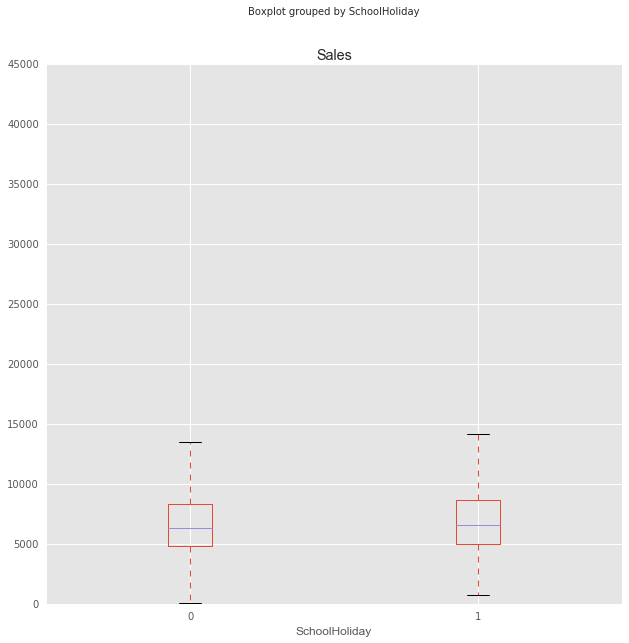

In [286]:
# train data
# is school holiday is effecting any sales?
#import plotly.plotly as py
#import cufflinks as cf
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
df = train[train.Sales != 0]
df = df[['SchoolHoliday', 'Sales']].sort_index()
fig, ax = plt.subplots(figsize=(10,  10))
df.boxplot('Sales','SchoolHoliday',ax)

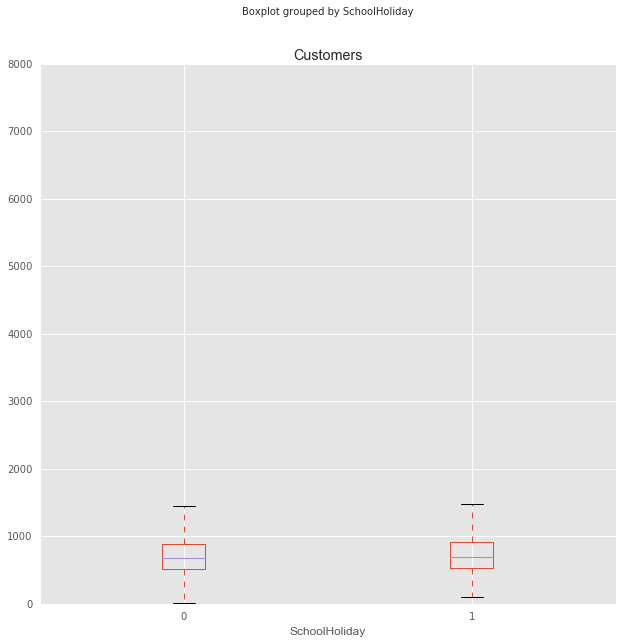

In [287]:
# train data
# is school holiday is effecting any sales?
#import plotly.plotly as py
#import cufflinks as cf
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
df = train[train.Sales != 0]
df = df[['SchoolHoliday', 'Customers']].sort_index()
fig, ax = plt.subplots(figsize=(10,  10))
df.boxplot('Customers','SchoolHoliday',ax)

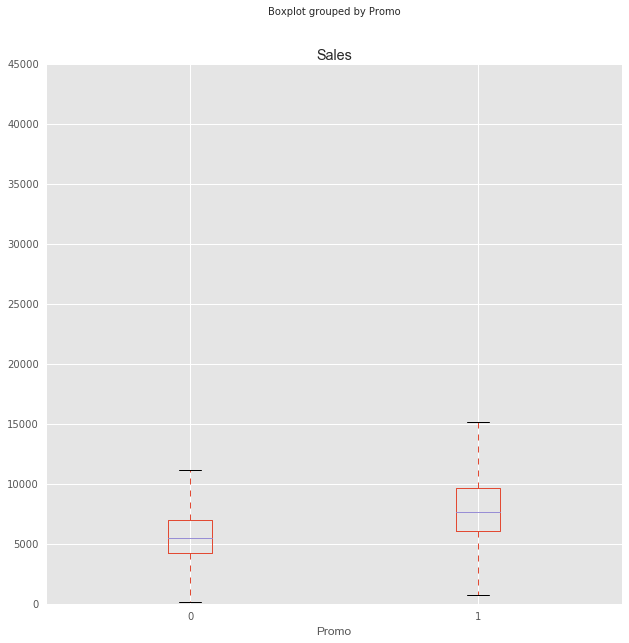

In [292]:
df = train[train.Sales != 0]
df = df[['Promo', 'Sales']].sort_index()
fig, ax = plt.subplots(figsize=(10,  10))
df.boxplot('Sales','Promo',ax)

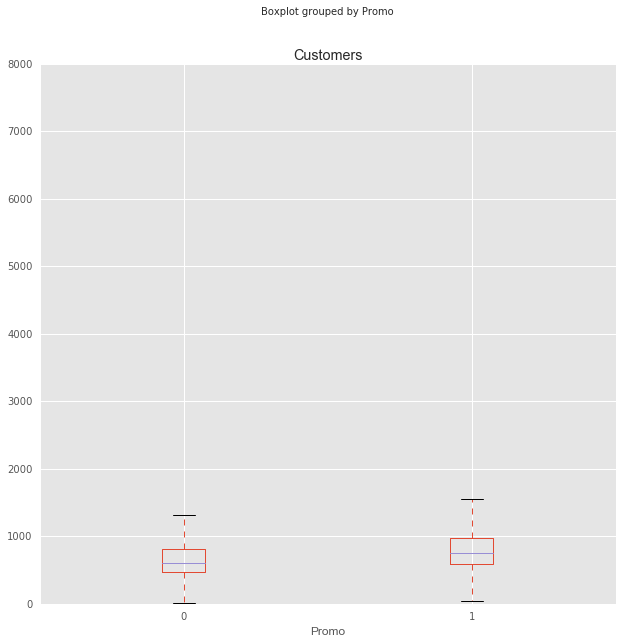

In [289]:

df = train[train.Sales != 0]
df = df[['Promo', 'Customers']].sort_index()
fig, ax = plt.subplots(figsize=(10,  10))
df.boxplot('Customers','Promo',ax)

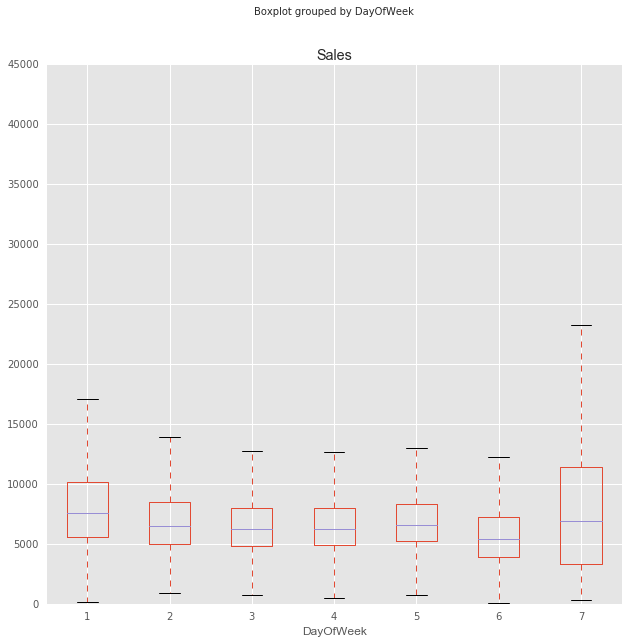

In [293]:
df = train[train.Sales != 0]
df = df[['DayOfWeek', 'Sales']].sort_index()
fig, ax = plt.subplots(figsize=(10,  10))
df.boxplot('Sales','DayOfWeek',ax)

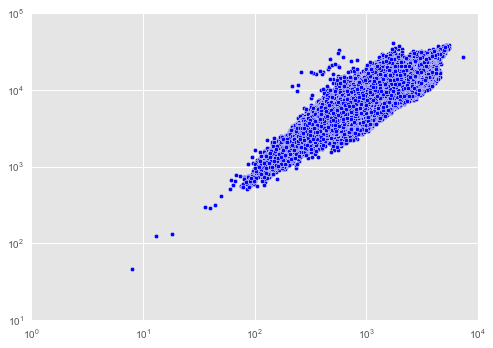

In [305]:
df = train[train.Sales != 0]
df = df[['Customers', 'Sales']].sort_index()
plt.scatter(df.Customers, df.Sales)
#plt.plot(df.Customers, df.Sales)
plt.xscale('log')
plt.yscale('log')
plt.show()



In [306]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [322]:
store.groupby('StoreType').size().to_frame() 

,0
StoreType,
a,602
b,17
c,148
d,348


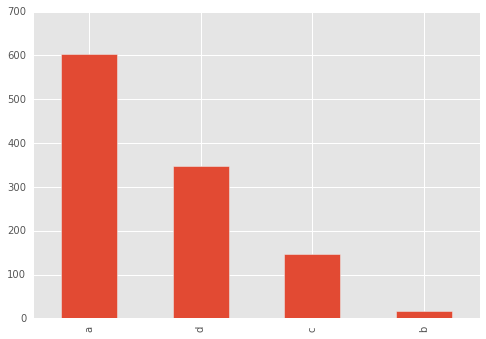

In [323]:
store.StoreType.value_counts().plot(kind = 'bar')

In [312]:
store.groupby('Assortment').size().to_frame()

,0
Assortment,
a,593
b,9
c,513


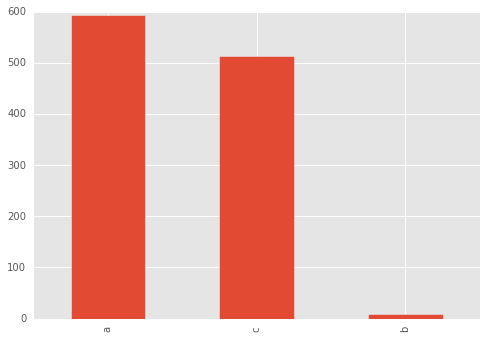

In [324]:
store.Assortment.value_counts().plot(kind = 'bar')

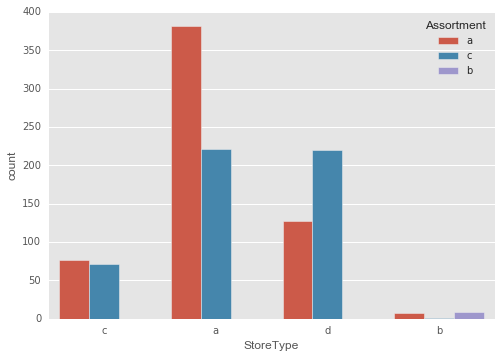

In [328]:
# relationship between store type and assortment type categories
# http://seaborn.pydata.org/tutorial/categorical.html
sns.countplot(x="StoreType", hue="Assortment", data=store)#, palette="Greens_d");

In [331]:
#plt.hist(store.CompetitionDistance)